## Классная работа

[ 0.31541525 -0.17401517  0.00527547]
0.19326772964332395


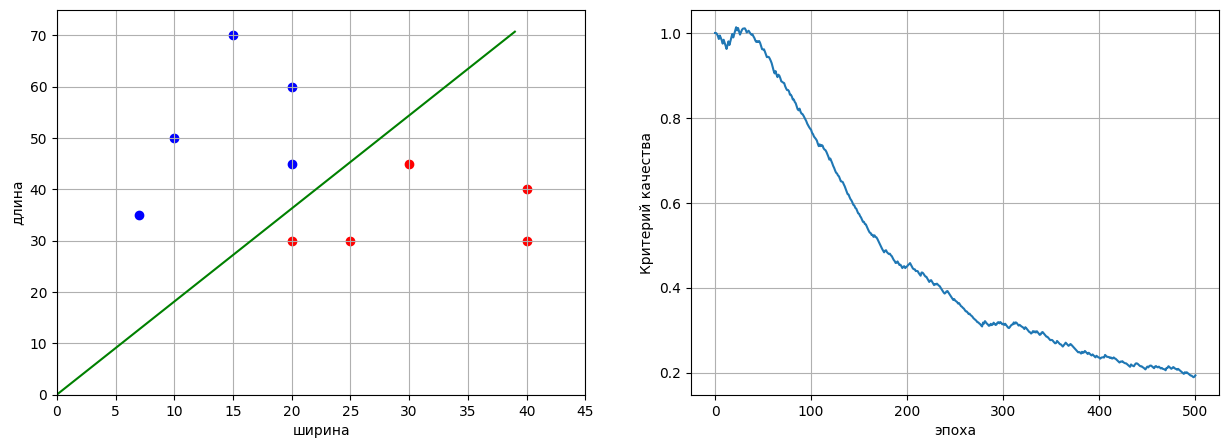

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))


# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

print(w)
print(Q_plot[-1])

line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(5)

# рисуем точки и разделяющую линию
axes[0].scatter(x_0[:, 0], x_0[:, 1], color='red')
axes[0].scatter(x_1[:, 0], x_1[:, 1], color='blue')
axes[0].plot(line_x, line_y, color='green')

axes[0].set_xlim([0, 45])
axes[0].set_ylim([0, 75])
axes[0].set_ylabel("длина")
axes[0].set_xlabel("ширина")
axes[0].grid(True)

# рисуем график изменения критерия качества по итерациям
axes[1].plot(range(N+1), Q_plot)
axes[1].set_ylabel("Критерий качества")
axes[1].set_xlabel("эпоха")
axes[1].grid(True)

## Домашняя работа

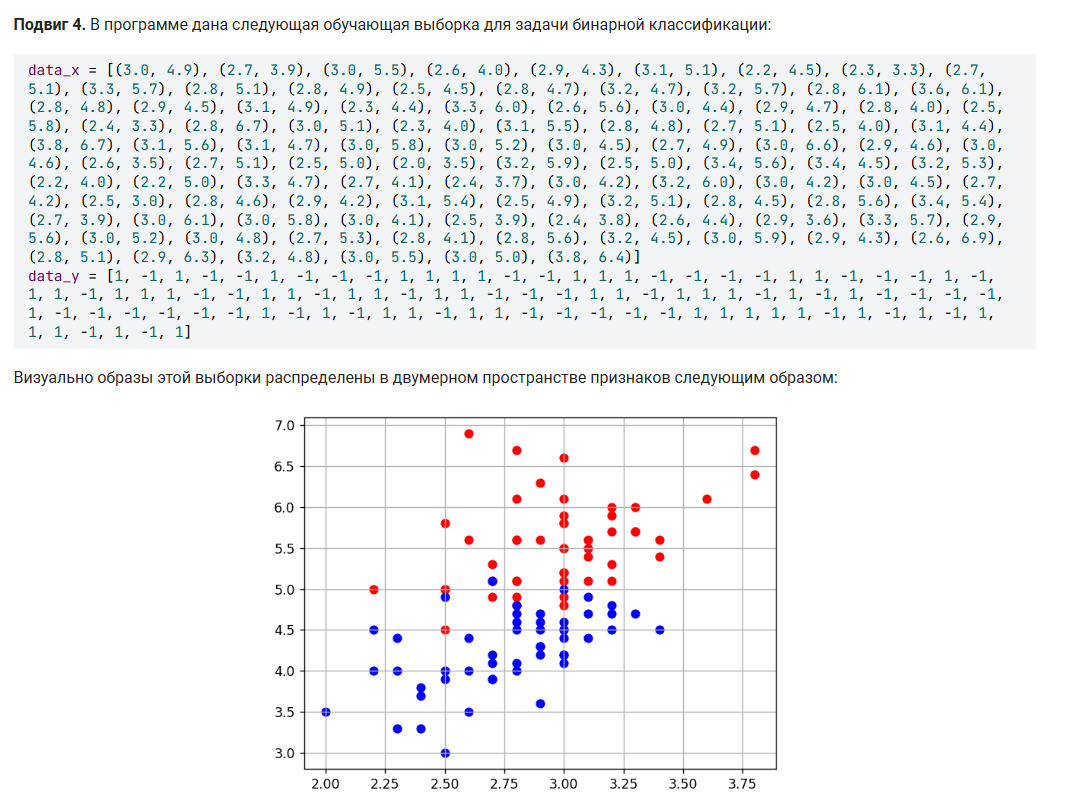
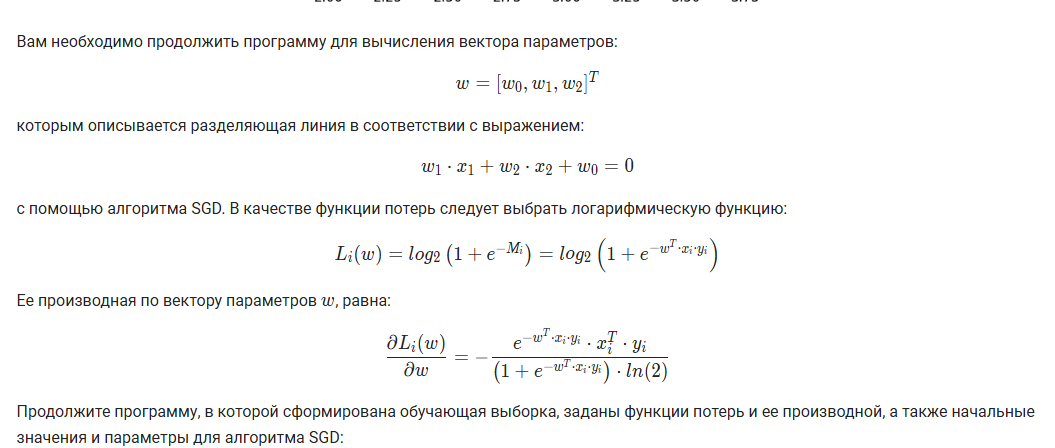
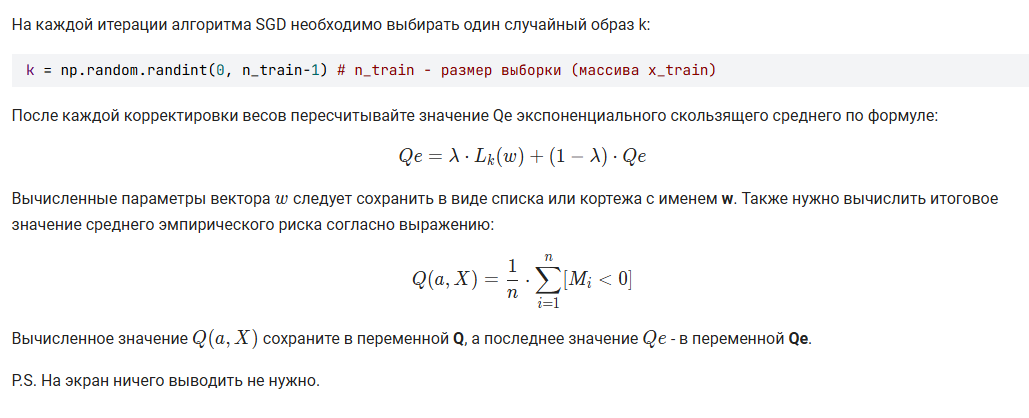

In [27]:
import numpy as np


# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])   # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD

Qe = np.mean(loss(w, x_train.T, y_train)) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# здесь продолжайте программу
for i in range(N):
    k = np.random.randint(0, n_train - 1)
    x = x_train[k]
    y = y_train[k]

    eps = loss(w, x, y)
    w = w - nt * df(w, x, y)
    Qe = lm * eps + (1 - lm) * Qe
Q = np.mean(w @ x_train.T * y_train < 0)
Q, Qe

(0.07, 0.5639720074688048)

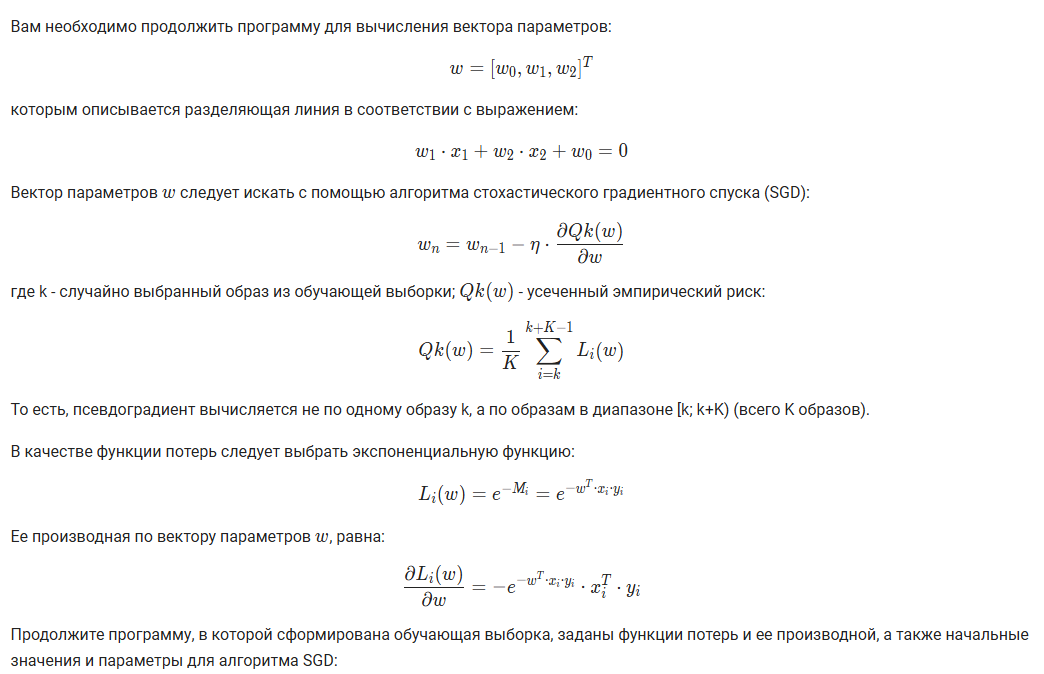
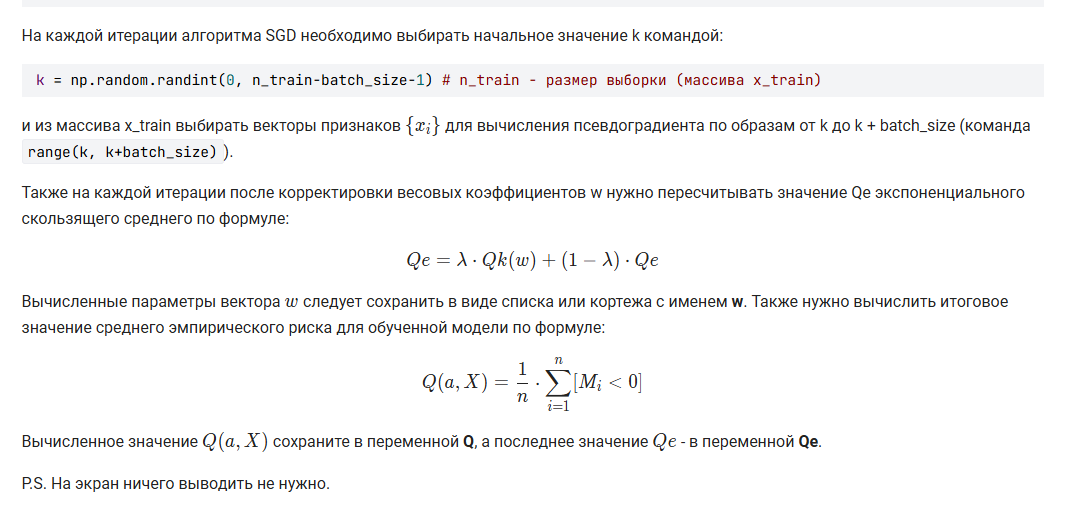

In [127]:
import numpy as np


# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)


# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -np.exp(-M) * x.T * y


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

Qe = np.mean(loss(w, x_train.T, y_train)) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
# здесь продолжайте программу
for i in range(N):
    k = np.random.randint(0, n_train-batch_size-1)
    eps = np.mean(loss(w, x_train[k:k+batch_size].T, y_train[k:k+batch_size]))
    w = w - nt * np.mean([df(w, x, y) for x, y in zip(x_train[k:k+batch_size], y_train[k:k+batch_size])], axis=0)
    
    Qe = lm * eps + (1 - lm) * Qe

Q = np.mean(w @ x_train.T * y_train < 0)
Qe, Q

(0.7092738058526213, 0.07)

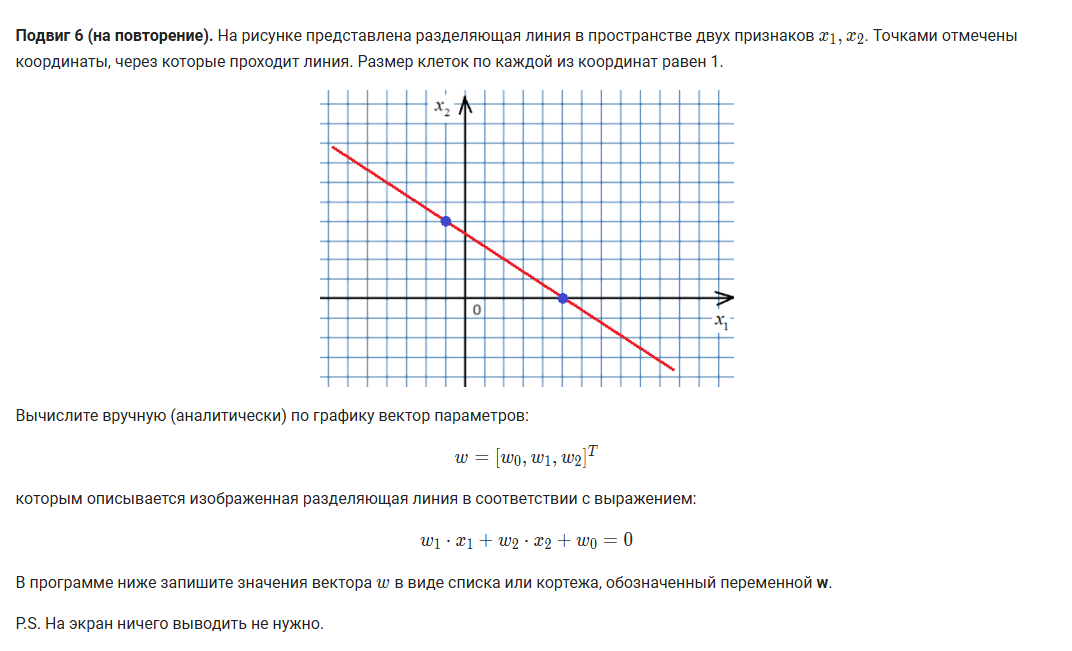

In [ ]:
w = [1, -1/5, -3/10]